<a href="https://colab.research.google.com/github/idhanth17/Fleet-Management/blob/main/Fleet_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("syednaveed05/logistics-fleet-data")

print("Path to dataset files:", path)

100%|██████████| 2.79M/2.79M [00:00<00:00, 132MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/syednaveed05/logistics-fleet-data/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/syednaveed05/logistics-fleet-data/versions/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/syednaveed05/logistics-fleet-data/versions/1/DimensionTables.xlsx
/root/.cache/kagglehub/datasets/syednaveed05/logistics-fleet-data/versions/1/fCosts.xlsx
/root/.cache/kagglehub/datasets/syednaveed05/logistics-fleet-data/versions/1/fFreight.csv


In [ ]:
dimension_tab = pd.read_excel('/root/.cache/kagglehub/datasets/syednaveed05/logistics-fleet-data/versions/1/DimensionTables.xlsx')
dimension_tab2 = pd.read_excel('/root/.cache/kagglehub/datasets/syednaveed05/logistics-fleet-data/versions/1/DimensionTables.xlsx', sheet_name = 'Vehicles')
dimension_tab3 = pd.read_excel('/root/.cache/kagglehub/datasets/syednaveed05/logistics-fleet-data/versions/1/DimensionTables.xlsx', sheet_name = 'Customers')
f_cost_1 = pd.read_excel('/root/.cache/kagglehub/datasets/syednaveed05/logistics-fleet-data/versions/1/fCosts.xlsx', header=1)
f_details_1 = pd.read_csv('/root/.cache/kagglehub/datasets/syednaveed05/logistics-fleet-data/versions/1/fFreight.csv')

In [ ]:
f_details_1.head(3)

,Date,Customer ID,Truck ID,Invoice Number,Freight ID,City,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value
0,2018/01/02,10975,38,774571,02/01/2018:MMA-5946,Herrings Crossroads,"7,42","2,5",3,"247,39"
1,2018/01/02,22346,23,774507,02/01/2018:MMA-4836,Enders,"3,54","2,62",3,"118,05"
2,2018/01/02,12208,23,774516,02/01/2018:MMA-4836,Shavertown,"8,98","5,54",9,"299,01"


In [ ]:
f_cost_1.drop([193], axis= 0, inplace = True)


In [ ]:
f_cost_1.head(3)

,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
0,2018-01-01 00:00:00,2,2,4594,1303.06,4077.49,1011.93,10502.595165
1,2018-01-01 00:00:00,6,4,3816,899.14,2813.7,1561.78,6092.156655
2,2018-01-01 00:00:00,17,9,7116,2128.46,6491,1324.12,11930.90331


In [ ]:
f_details_1.isnull().sum()

,0
Date,0
Customer ID,0
Truck ID,0
Invoice Number,0
Freight ID,0
City,0
Net Revenue,0
Weight (Kg),0
Weight (Cubic),0
Goods Value,0


In [ ]:
f_cost_1.isnull().sum()

,0
Date,1
Truck ID,2
Drive ID,2
KM Traveled,2
Liters,2
Fuel,2
Maintenance,2
Fixed Costs,2


In [ ]:
f_cost_1 = f_cost_1.dropna()
f_cost_1.reset_index()

,index,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
0,0,2018-01-01 00:00:00,2,2,4594,1303.06,4077.49,1011.93,10502.595165
1,1,2018-01-01 00:00:00,6,4,3816,899.14,2813.7,1561.78,6092.156655
2,2,2018-01-01 00:00:00,17,9,7116,2128.46,6491,1324.12,11930.90331
3,3,2018-01-01 00:00:00,19,11,2724,669.73,2123.58,560.17,7428.016155
4,4,2018-01-01 00:00:00,20,12,3862,723.02,2378.19,648.11,6735.388638
...,...,...,...,...,...,...,...,...,...
291,293,2019-08-01 00:00:00,4,7,2202,467.56,1483.95,869.21,7870.687635
292,294,2019-08-01 00:00:00,34,13,5221,1174.76,3895.92,1148.01,8947.469745
293,295,2019-08-01 00:00:00,17,5,4468,1992.37,6319.54,1565.36,11456.70372
294,296,2019-08-01 00:00:00,23,31,3568,757.22,2434.89,510.34,7487.371638


In [ ]:
dimension_tab3

,Customer ID,City,State,Latitude,Longitude
0,5,Mineola,KY,38.8881,-91.5714
1,6,Mineola,KY,38.8881,-91.5714
2,21,Mineola,KY,38.8881,-91.5714
3,34,Mineola,KY,38.8881,-91.5714
4,43,Mineola,KY,38.8881,-91.5714
...,...,...,...,...,...
43905,43898,Dalecrest,OH,38.8144,-77.1039
43906,43899,Glen Isle,DE,38.9578,-76.5906
43907,43901,Milne,IN,39.2631,-88.7922
43908,43905,Campbellsville,WY,37.3433,-85.3419


In [ ]:
f_cost_2 = f_cost_1.drop(index = 1)
f_cost_2.reset_index()
f_cost_2

,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
0,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
2,2018-01-01 00:00:00,6,4,3816,899.14,2813.7,1561.78,6092.156655
3,2018-01-01 00:00:00,17,9,7116,2128.46,6491,1324.12,11930.90331
4,2018-01-01 00:00:00,19,11,2724,669.73,2123.58,560.17,7428.016155
5,2018-01-01 00:00:00,20,12,3862,723.02,2378.19,648.11,6735.388638
...,...,...,...,...,...,...,...,...
294,2019-08-01 00:00:00,4,7,2202,467.56,1483.95,869.21,7870.687635
295,2019-08-01 00:00:00,34,13,5221,1174.76,3895.92,1148.01,8947.469745
296,2019-08-01 00:00:00,17,5,4468,1992.37,6319.54,1565.36,11456.70372
297,2019-08-01 00:00:00,23,31,3568,757.22,2434.89,510.34,7487.371638


In [ ]:
f_cost_2.iloc[0:196]


,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
0,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
2,2018-01-01 00:00:00,6,4,3816,899.14,2813.7,1561.78,6092.156655
3,2018-01-01 00:00:00,17,9,7116,2128.46,6491,1324.12,11930.90331
4,2018-01-01 00:00:00,19,11,2724,669.73,2123.58,560.17,7428.016155
5,2018-01-01 00:00:00,20,12,3862,723.02,2378.19,648.11,6735.388638
...,...,...,...,...,...,...,...,...
196,2019-01-01 00:00:00,20,12,4382,755.66,2795.55,817.84,12336.9
197,2019-01-01 00:00:00,22,14,5287,1026.61,3684.6,578.29,13665.45
198,2019-01-01 00:00:00,29,21,2533,496.55,1857.72,746.49,11347.5
199,2019-02-01 00:00:00,2,2,4885,1418.95,4633.13,1276.02,19484.55


In [ ]:
f_cost_2.drop([0], axis= 0, inplace = True)
f_cost_2.reset_index()

,index,Date,Truck ID,Drive ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs
0,2,2018-01-01 00:00:00,6,4,3816,899.14,2813.7,1561.78,6092.156655
1,3,2018-01-01 00:00:00,17,9,7116,2128.46,6491,1324.12,11930.90331
2,4,2018-01-01 00:00:00,19,11,2724,669.73,2123.58,560.17,7428.016155
3,5,2018-01-01 00:00:00,20,12,3862,723.02,2378.19,648.11,6735.388638
4,6,2018-01-01 00:00:00,22,14,5074,1000.59,3200.11,416.48,7064.379138
...,...,...,...,...,...,...,...,...,...
288,294,2019-08-01 00:00:00,4,7,2202,467.56,1483.95,869.21,7870.687635
289,295,2019-08-01 00:00:00,34,13,5221,1174.76,3895.92,1148.01,8947.469745
290,296,2019-08-01 00:00:00,17,5,4468,1992.37,6319.54,1565.36,11456.70372
291,297,2019-08-01 00:00:00,23,31,3568,757.22,2434.89,510.34,7487.371638


In [ ]:
f_cost_2['Date'] = pd.to_datetime(f_cost_2['Date'])
f_cost_2['KM Traveled'] = f_cost_2['KM Traveled'].astype(str).astype(int)
f_cost_2['Liters'] = f_cost_2['Liters'].astype(str).astype(float)
f_cost_2['Fuel'] = f_cost_2['Fuel'].astype(str).astype(float)
f_cost_2['Maintenance'] = f_cost_2['Maintenance'].astype(str).astype(float)
f_cost_2['Fixed Costs'] = f_cost_2['Fixed Costs'].astype(str).astype(float)

In [ ]:
f_details_1['Net Revenue'] = f_details_1['Net Revenue'].replace(',', '.',regex= True)
f_details_1['Weight (Kg)'] = f_details_1['Weight (Kg)'].replace(',', '.',regex= True)
f_details_1['Weight (Cubic)'] = f_details_1['Weight (Cubic)'].replace(',', '.',regex= True)
f_details_1['Goods Value'] = f_details_1['Goods Value'].replace(',', '',regex= True)
f_details_1.head(4)

,Date,Customer ID,Truck ID,Invoice Number,Freight ID,City,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value
0,2018-01-02,10975,38,774571,02/01/2018:MMA-5946,Herrings Crossroads,7.42,2.50,3.0,247.39
1,2018-01-02,22346,23,774507,02/01/2018:MMA-4836,Enders,3.54,2.62,3.0,118.05
2,2018-01-02,12208,23,774516,02/01/2018:MMA-4836,Shavertown,8.98,5.54,9.0,299.01
3,2018-01-02,1929,23,774626,02/01/2018:MMA-4836,Enders,12.49,7.80,9.0,416.27


In [ ]:
f_details_1['Date'] = pd.to_datetime(f_details_1['Date'])
f_details_1['Net Revenue'] = f_details_1['Net Revenue'].astype(str).astype(float)
f_details_1['Weight (Kg)'] = f_details_1['Weight (Kg)'].astype(str).astype(float)
f_details_1['Weight (Cubic)'] = f_details_1['Weight (Cubic)'].astype(str).astype(float)
f_details_1['Goods Value'] = f_details_1['Goods Value'].astype(str).astype(float)
f_details_1['Year'] = f_details_1['Date'].dt.year

In [ ]:
f_details_1['Net Revenue'] = f_details_1['Net Revenue'] *1000
f_details_1

,Date,Customer ID,Truck ID,Invoice Number,Freight ID,City,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value,Year
0,2018-01-02,10975,38,774571,02/01/2018:MMA-5946,Herrings Crossroads,7420.0,2.50,3.00,247.39,2018
1,2018-01-02,22346,23,774507,02/01/2018:MMA-4836,Enders,3540.0,2.62,3.00,118.05,2018
2,2018-01-02,12208,23,774516,02/01/2018:MMA-4836,Shavertown,8980.0,5.54,9.00,299.01,2018
3,2018-01-02,1929,23,774626,02/01/2018:MMA-4836,Enders,12490.0,7.80,9.00,416.27,2018
4,2018-01-02,6198,23,774623,02/01/2018:MMA-4836,Enders,2490.0,8.55,9.00,82.90,2018
...,...,...,...,...,...,...,...,...,...,...,...
92055,2019-08-31,23984,19,1049953,31/08/2019:MDB-1602,Bloom,63860.0,77.13,77.13,4763.67,2019
92056,2019-08-31,23984,23,1049950,31/08/2019:MMA-4836,Bloom,63860.0,128.86,128.86,7792.43,2019
92057,2019-08-31,23984,23,1049949,31/08/2019:MMA-4836,Bloom,63860.0,333.63,333.63,14376.69,2019
92058,2019-08-31,23984,45,1049954,31/08/2019:QJP-8960,Bloom,63860.0,85.52,85.52,5886.72,2019


In [ ]:
f_details_2 = f_details_1.merge(dimension_tab2,how = 'left', on = 'Truck ID' )
f_details_3 = f_details_2.merge(dimension_tab3,how = 'left', on = 'Customer ID' )
f_details_4 = f_details_3.rename(columns={"Year_x": "Year", "Year_y": "Truck Age" , 'City_x' : 'City'})
f_details_4.drop('City_y', axis = 1, inplace = True)
f_details_4.head()

,Date,Customer ID,Truck ID,Invoice Number,Freight ID,City,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value,Year,Plate,Brand,Truck Type,Trailers Type,Truck Age,State,Latitude,Longitude
0,2018-01-02,10975,38,774571,02/01/2018:MMA-5946,Herrings Crossroads,7420.0,2.50,3.0,247.39,2018,MMA-5946,VW,TRAILER,Fridge,2014,OK,35.1214,-77.8661
1,2018-01-02,22346,23,774507,02/01/2018:MMA-4836,Enders,3540.0,2.62,3.0,118.05,2018,MMA-4836,VW,TRAILER,Fridge,2014,WV,35.3267,-92.2283
2,2018-01-02,12208,23,774516,02/01/2018:MMA-4836,Shavertown,8980.0,5.54,9.0,299.01,2018,MMA-4836,VW,TRAILER,Fridge,2014,OK,38.6636,-78.6264
3,2018-01-02,1929,23,774626,02/01/2018:MMA-4836,Enders,12490.0,7.80,9.0,416.27,2018,MMA-4836,VW,TRAILER,Fridge,2014,WV,35.3267,-92.2283
4,2018-01-02,6198,23,774623,02/01/2018:MMA-4836,Enders,2490.0,8.55,9.0,82.90,2018,MMA-4836,VW,TRAILER,Fridge,2014,WV,35.3267,-92.2283


In [ ]:
f_details_4_Trips = f_details_4.groupby('Truck Type')['Plate'].count()
f_details_4_Trips1 = f_details_4_Trips.reset_index()
f_details_4_Trips1

,Truck Type,Plate
0,BOX,15153
1,SEMI-TRAILER,2941
2,TRACTOR,711
3,TRAILER,73255


In [ ]:
f_cost_3 = f_cost_2.merge(dimension_tab2, how = 'left', on = 'Truck ID')
f_cost_4 = f_cost_3.rename(columns={"Drive ID": "Driver ID"})
f_cost_4 = f_cost_4.merge(dimension_tab, how = 'left', on = 'Driver ID')
f_cost_4.head(3)

,Date,Truck ID,Driver ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs,Plate,Brand,Truck Type,Trailers Type,Year,Driver
0,2018-01-01,6,4,3816,899.14,2813.70,1561.78,6092.156655,MHN-5539,VW,BOX,Fridge,2010,Karol Woods
1,2018-01-01,17,9,7116,2128.46,6491.00,1324.12,11930.903310,MJI-0517,VW,TRACTOR,Dry,2011,Kenzie Macdonald
2,2018-01-01,19,11,2724,669.73,2123.58,560.17,7428.016155,MDB-1602,VW,BOX,Reefer,2013,Maheen Nicholls


In [ ]:
f_cost_TruckID = f_cost_4.groupby(['Truck ID','Truck Type','Plate'])[['KM Traveled', 'Liters', 'Fuel', 'Maintenance', 'Fixed Costs']].sum()
f_details_TruckID = f_details_4.groupby(['Truck ID','Truck Type','Plate'])[['Net Revenue', 'Weight (Kg)', 'Weight (Cubic)', 'Goods Value']].sum()
merged_log = f_cost_TruckID.merge(f_details_TruckID, how='inner', on=['Truck ID', 'Truck Type', 'Plate'])
merged_log.head(3)

,,,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value
Truck ID,Truck Type,Plate,,,,,,,,,
2,SEMI-TRAILER,MJD-6976,104530,30372.53,99444.74,24815.92,216387.179745,466361310.0,834676.98,1177795.15,11211220.97
3,SEMI-TRAILER,MJT-4829,69724,19712.35,64660.08,22806.11,147388.142915,486007640.0,910298.31,1254899.18,12937465.35
4,TRAILER,MHJ-9634,48501,8422.50,26939.54,16228.87,111750.936440,244193290.0,293797.25,440123.92,7036593.11


In [ ]:
f_cost_DriverID = f_cost_4.groupby(['Driver ID'])[['KM Traveled', 'Liters', 'Fuel', 'Maintenance', 'Fixed Costs']].sum().reset_index()
f_cost_DriverID = f_cost_DriverID.merge(dimension_tab, on = 'Driver ID', how = 'left')
f_cost_DriverID

,Driver ID,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs,Driver
0,1,84336,22028.36,69797.78,41069.24,273320.170825,No Driver
1,2,104530,30372.53,99444.74,24815.92,216387.179745,Ridwan Greaves
2,3,59494,10358.11,33160.48,13806.50,114788.698931,Efan Archer
3,4,7073,1762.95,5748.80,4930.71,18515.803965,Karol Woods
4,5,111137,36588.74,122235.96,28661.27,242129.188770,Amman Vega
5,7,11503,2194.32,7199.44,5095.61,37243.433184,Nikola Weiss
6,8,19657,4303.04,14680.56,2498.39,33740.669355,Tierney Reynolds
7,9,27457,8002.54,25388.01,9709.26,71905.317360,Kenzie Macdonald
8,11,109887,26421.19,90907.54,15013.73,204298.573530,Maheen Nicholls
9,12,89585,15622.88,55212.11,15513.38,210121.696930,Stevie Schofield


In [ ]:
dimension_tab3_city_group = dimension_tab3.groupby(['City','Latitude', 'Longitude'])['Customer ID'].nunique().reset_index()
dimension_tab3_city_group

,City,Latitude,Longitude,Customer ID
0,Aa Junction,36.0797,-90.9397,24
1,Airport Road Addition,27.2197,-98.0992,15
2,Alfalfa Center,40.6922,-99.1789,34
3,Alpaugh,35.8878,-119.4860,110
4,Altamaha Park,31.4264,-81.6072,54
...,...,...,...,...
549,Woodlawn Manor,38.7111,-77.1192,24
550,Woodlyn,39.5700,-83.1142,54
551,Woodstock,43.4725,-90.4272,59
552,Woolworth,31.6331,-90.2733,1


In [ ]:
f_details_CustomerID = f_details_4.groupby(['City'])[['Weight (Kg)', 'Weight (Cubic)', 'Goods Value']].sum().reset_index()
f_details_CustomerID = f_details_4.groupby(['City'])[['Weight (Kg)', 'Weight (Cubic)', 'Goods Value']].sum().reset_index()
f_details_CustomerID = f_details_CustomerID.merge(dimension_tab3_city_group, on = 'City', how = 'left')
f_details_CustomerID

,City,Weight (Kg),Weight (Cubic),Goods Value,Latitude,Longitude,Customer ID
0,Aa Junction,4443.98,4684.65,32853.06,36.0797,-90.9397,24
1,Airport Road Addition,1176.30,1526.60,23280.36,27.2197,-98.0992,15
2,Alfalfa Center,434.91,736.19,4666.92,40.6922,-99.1789,34
3,Alpaugh,1057.80,1099.53,5306.12,35.8878,-119.4860,110
4,Altamaha Park,10853.40,15131.79,213421.15,31.4264,-81.6072,54
...,...,...,...,...,...,...,...
291,Woodford,66.02,104.93,2211.60,33.4042,-86.7236,4
292,Woodland Heights,39954.94,56373.26,718556.09,33.3903,-111.7570,331
293,Woodlawn Manor,86.84,94.14,979.47,38.7111,-77.1192,24
294,Woodstock,461.59,746.86,5310.61,43.4725,-90.4272,59


In [ ]:
merged_log['KM per Liter'] = merged_log['KM Traveled'] / merged_log['Liters']
merged_log['Maintenance per KM'] = merged_log['Maintenance'] / merged_log['KM Traveled']
merged_log['Total Costs'] = merged_log['Fuel'] + merged_log['Maintenance'] + merged_log['Fixed Costs'].astype(int)
merged_log['Costs per KM'] = merged_log['Total Costs'] / merged_log['KM Traveled']
merged_log['Costs per kg'] = merged_log['Total Costs'] / merged_log['Weight (Kg)']
merged_log['Revenue per KM'] = merged_log['Net Revenue'] / merged_log['KM Traveled']
merged_log['Revenue per kg'] = merged_log['Maintenance'] / merged_log['Weight (Kg)']
merged_log['Net Profit'] = merged_log['Net Revenue'] - merged_log['Total Costs'].astype(int)
merged_log['Fuel costs per KM'] = merged_log['Fuel'] / merged_log['KM Traveled']
merged_log['Fixed costs per KM'] = merged_log['Fixed Costs'] / merged_log['KM Traveled']

merged_log2 = merged_log.reset_index()

merged_log2.head()

,Truck ID,Truck Type,Plate,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs,Net Revenue,Weight (Kg),...,KM per Liter,Maintenance per KM,Total Costs,Costs per KM,Costs per kg,Revenue per KM,Revenue per kg,Net Profit,Fuel costs per KM,Fixed costs per KM
0,2,SEMI-TRAILER,MJD-6976,104530,30372.53,99444.74,24815.92,216387.179745,466361310.0,834676.98,...,3.441597,0.237405,340647.66,3.258851,0.408119,4461.506840,0.029731,466020663.0,0.951351,2.070096
1,3,SEMI-TRAILER,MJT-4829,69724,19712.35,64660.08,22806.11,147388.142915,486007640.0,910298.31,...,3.537072,0.327091,234854.19,3.368341,0.257997,6970.449773,0.025053,485772786.0,0.927372,2.113880
2,4,TRAILER,MHJ-9634,48501,8422.50,26939.54,16228.87,111750.936440,244193290.0,293797.25,...,5.758504,0.334609,154918.41,3.194128,0.527297,5034.809385,0.055238,244038372.0,0.555443,2.304096
3,5,TRAILER,MKP-6610,16735,3177.24,10218.76,7748.33,51577.283463,53182760.0,68609.53,...,5.267150,0.463001,69544.09,4.155607,1.013621,3177.936062,0.112934,53113216.0,0.610622,3.082001
4,6,BOX,MHN-5539,4823,1143.32,3569.24,3657.55,12479.978310,28282360.0,72960.54,...,4.218417,0.758356,19705.79,4.085795,0.270088,5864.059714,0.050131,28262655.0,0.740046,2.587597


In [ ]:
pd.set_option('display.max_columns', None)
merged_log2.head(2)

,Truck ID,Truck Type,Plate,KM Traveled,Liters,Fuel,Maintenance,Fixed Costs,Net Revenue,Weight (Kg),Weight (Cubic),Goods Value,KM per Liter,Maintenance per KM,Total Costs,Costs per KM,Costs per kg,Revenue per KM,Revenue per kg,Net Profit,Fuel costs per KM,Fixed costs per KM
0,2,SEMI-TRAILER,MJD-6976,104530,30372.53,99444.74,24815.92,216387.179745,466361310.0,834676.98,1177795.15,11211220.97,3.441597,0.237405,340647.66,3.258851,0.408119,4461.506840,0.029731,466020663.0,0.951351,2.070096
1,3,SEMI-TRAILER,MJT-4829,69724,19712.35,64660.08,22806.11,147388.142915,486007640.0,910298.31,1254899.18,12937465.35,3.537072,0.327091,234854.19,3.368341,0.257997,6970.449773,0.025053,485772786.0,0.927372,2.113880


In [ ]:
truck_type_analysis = merged_log2.groupby('Truck Type')[['Costs per KM', 'Maintenance per KM', 'Fuel costs per KM', 'Fixed costs per KM']].mean()
truck_type_analysis

,Costs per KM,Maintenance per KM,Fuel costs per KM,Fixed costs per KM
Truck Type,,,,
BOX,3.306925,0.310087,0.786603,2.210279
SEMI-TRAILER,6.928976,0.759248,0.963874,5.205868
TRACTOR,3.701182,0.299977,1.119682,2.281525
TRAILER,3.133930,0.228937,0.621443,2.283565


<Axes: xlabel='Truck Type'>

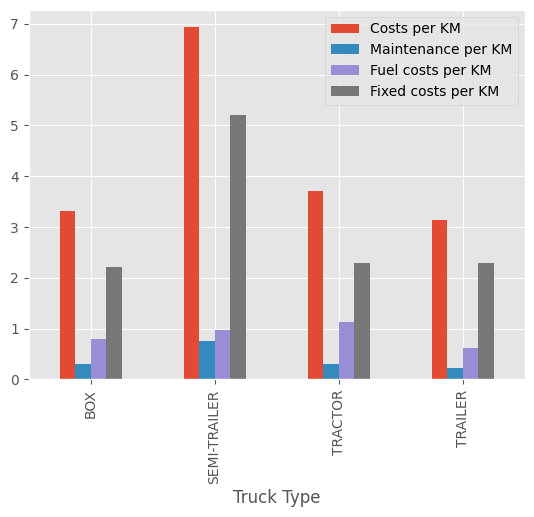

In [66]:
truck_type_analysis.plot(kind = 'bar')


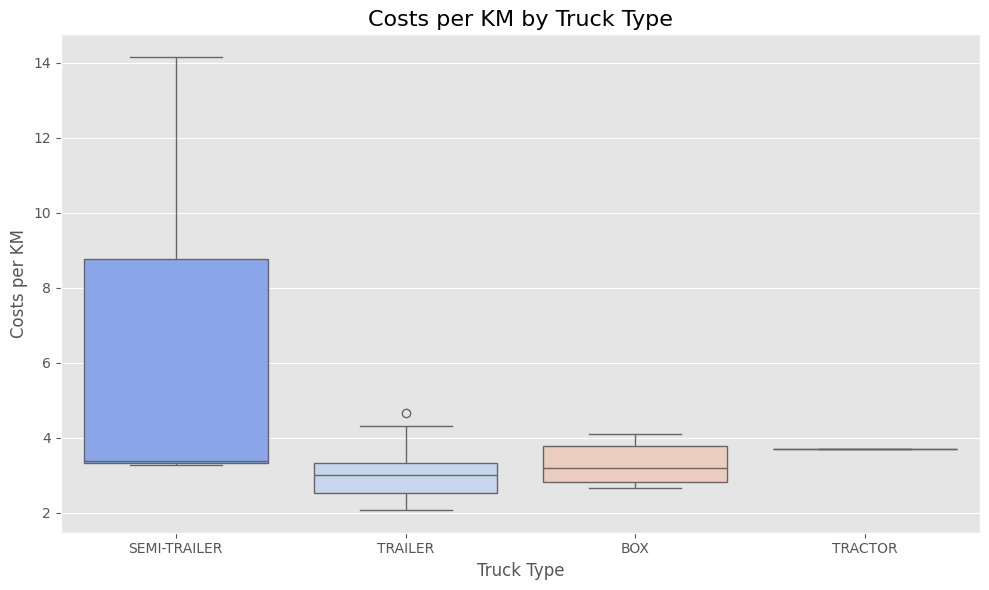

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_log2, x='Truck Type', y='Costs per KM', palette='coolwarm',hue='Truck Type',legend=False)
plt.title('Costs per KM by Truck Type', fontsize=16)
plt.xlabel('Truck Type', fontsize=12)
plt.ylabel('Costs per KM', fontsize=12)
plt.tight_layout()
plt.show()

In [74]:
merged_log_profit = merged_log.groupby('Truck Type')['Net Profit'].mean().astype(int).sort_values(ascending = False)
merged_log_profit1 = merged_log_profit.reset_index()
merged_log_profit1

,Truck Type,Net Profit
0,TRACTOR,506934133
1,SEMI-TRAILER,344274632
2,TRAILER,210100050
3,BOX,195225563


In [75]:
net_profit_per_trip = merged_log_profit1.merge(f_details_4_Trips1, how = 'left', on = 'Truck Type')
net_profit_per_trip1 = net_profit_per_trip.rename(columns = {'Plate' : 'Number of Trips'})
net_profit_per_trip1['Net Profit per Trip'] = net_profit_per_trip1['Net Profit'] / net_profit_per_trip1['Number of Trips'].astype(int)
net_profit_per_trip1.sort_values(by = 'Net Profit per Trip', ascending = False)

,Truck Type,Net Profit,Number of Trips,Net Profit per Trip
0,TRACTOR,506934133,711,712987.528833
1,SEMI-TRAILER,344274632,2941,117060.398504
3,BOX,195225563,15153,12883.624563
2,TRAILER,210100050,73255,2868.064296


In [76]:
f_cost_DriverID[['Driver', 'KM Traveled']].sort_values(by = 'KM Traveled',ascending = False).reset_index().head(5)

,index,Driver,KM Traveled
0,11,Yasin Buck,111863
1,4,Amman Vega,111137
2,8,Maheen Nicholls,109887
3,1,Ridwan Greaves,104530
4,9,Stevie Schofield,89585


In [77]:
merged_log2[['Truck ID','Net Profit', 'Net Revenue','Total Costs']].sort_values(by = 'Net Profit', ascending = False).head(5)
#top performing trucks

,Truck ID,Net Profit,Net Revenue,Total Costs
6,17,506934133.0,507372900.0,438767.68
1,3,485772786.0,486007640.0,234854.19
0,2,466020663.0,466361310.0,340647.66
9,22,376914790.0,377164460.0,249670.30
17,37,355517898.0,355654320.0,136422.21


In [78]:
merged_log2[['Truck ID','Net Profit', 'Net Revenue','Total Costs']].sort_values(by = 'Net Profit', ascending = True).head(5)
#Least performing trucks

,Truck ID,Net Profit,Net Revenue,Total Costs
4,6,28262655.0,28282360.0,19705.79
3,5,53113216.0,53182760.0,69544.09
5,7,63481004.0,63550980.0,69976.69
12,28,77291191.0,77387650.0,96459.46
19,42,80222551.0,80278490.0,55939.13


In [79]:
f_details_CustomerID['Goods Value'] = f_details_CustomerID['Goods Value'].astype(int)
top_10_cities = f_details_CustomerID[['City', 'Goods Value']].sort_values(by = 'Goods Value', ascending = False).drop_duplicates().head(10)
top_10_cities

,City,Goods Value
26,Bloom,25114584
232,Sandy Lane,9216251
77,Enders,8699839
165,Mineola,7863299
162,Mcmechen,6114751
124,Irving,6041314
113,Herrings Crossroads,5441079
12,Banner Crest,5384355
295,Yucca Valley,5291670
85,Farmers,4577834


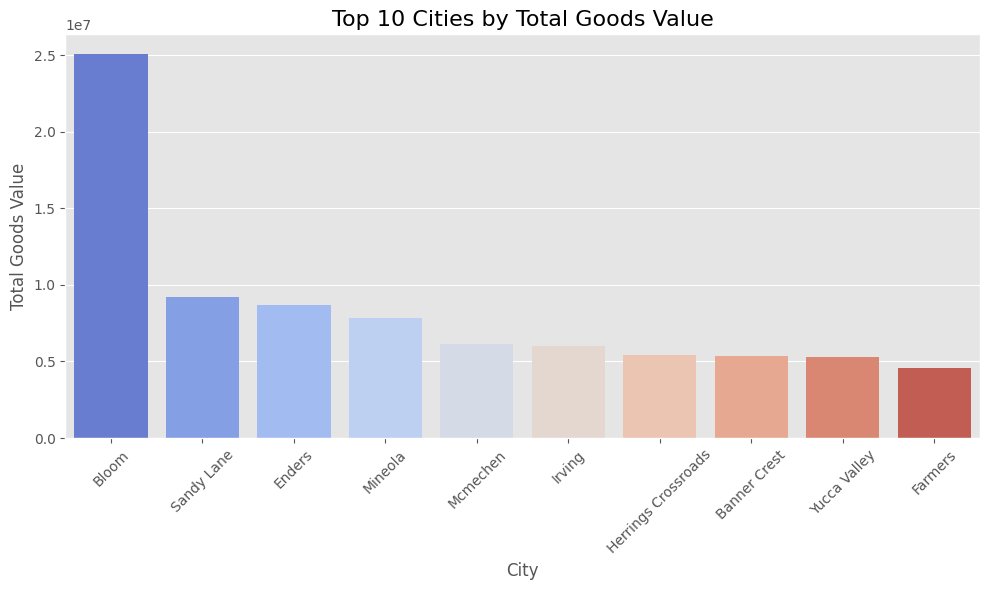

In [82]:
top_cities = top_10_cities.nlargest(10, 'Goods Value')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_cities, x='City', y='Goods Value', palette='coolwarm',hue='City',legend=False)
plt.title('Top 10 Cities by Total Goods Value', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Goods Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

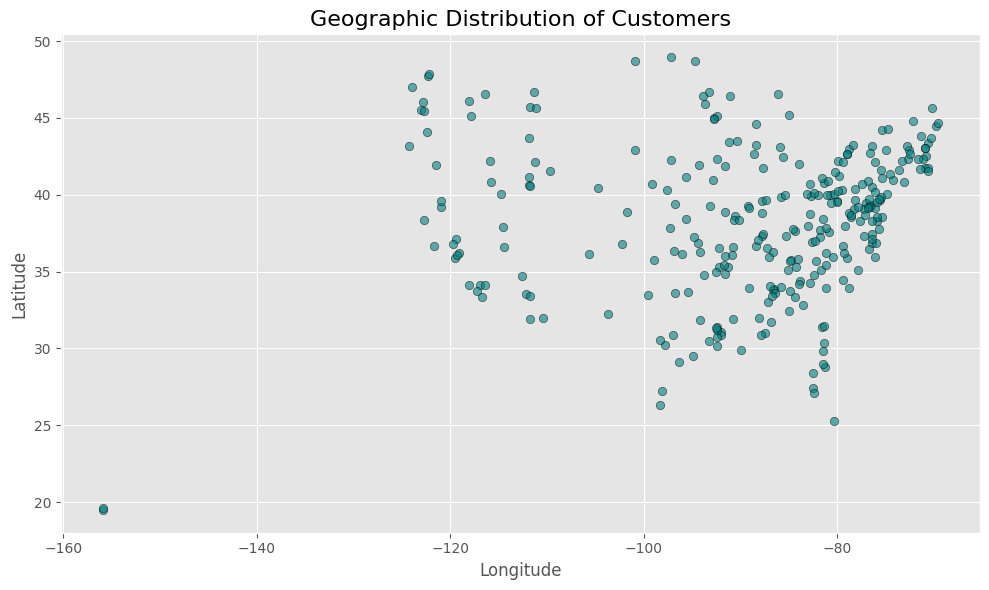

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(f_details_CustomerID['Longitude'], f_details_CustomerID['Latitude'], alpha=0.6, color='teal', edgecolor='black')
plt.title('Geographic Distribution of Customers', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()

In [84]:
fuel_efficiency_by_type = merged_log2.groupby('Truck Type')['KM per Liter'].mean().sort_values(ascending=False)
fuel_efficiency_by_type.reset_index()

,Truck Type,KM per Liter
0,TRAILER,5.437530
1,BOX,4.188198
2,SEMI-TRAILER,3.422116
3,TRACTOR,2.961454


In [85]:
KM_Travelled_truck_type = merged_log2.groupby('Truck Type')['KM Traveled'].mean().sort_values(ascending=False)
KM_Travelled_truck_type.reset_index()

,Truck Type,KM Traveled
0,TRACTOR,118548.000000
1,SEMI-TRAILER,60105.000000
2,BOX,51156.000000
3,TRAILER,43852.571429


In [86]:
Net_profit_truck_type = merged_log2.groupby('Truck Type')['Net Profit'].mean().sort_values(ascending=False).astype(int)
Net_profit_truck_type.reset_index()

,Truck Type,Net Profit
0,TRACTOR,506934133
1,SEMI-TRAILER,344274632
2,TRAILER,210100050
3,BOX,195225563


In [88]:
top_maintenance_costs = merged_log2.nlargest(5, 'Maintenance per KM')[['Truck ID', 'Truck Type', 'Maintenance per KM', 'Net Profit']]
top_maintenance_costs

,Truck ID,Truck Type,Maintenance per KM,Net Profit
16,36,SEMI-TRAILER,1.713247,81030448.0
4,6,BOX,0.758356,28262655.0
21,44,TRAILER,0.500165,119117748.0
3,5,TRAILER,0.463001,53113216.0
15,34,BOX,0.411031,278796768.0


In [89]:
correlation_profit = merged_log2['KM per Liter'].corr(merged_log2['Net Profit'])
correlation_revenue = merged_log2['KM per Liter'].corr(merged_log2['Net Revenue'])

print("\nCorrelation between KM per Liter and Net Profit:", correlation_profit)
print("Correlation between KM per Liter and Net Revenue:", correlation_revenue)
correlation_profitKM = merged_log2['KM Traveled'].corr(merged_log2['Net Profit'])
correlation_revenueKM = merged_log2['KM Traveled'].corr(merged_log2['Net Revenue'])

print("\nCorrelation between KM Traveled and Net Profit:", correlation_profitKM)
print("Correlation between KM Traveled and Net Revenue:", correlation_revenueKM)

correlation_maintenance_profit = merged_log2['Maintenance per KM'].corr(merged_log2['Net Profit'])
print("\nCorrelation between Maintenance Cost per KM and Net Profit:", correlation_maintenance_profit)


Correlation between KM per Liter and Net Profit: -0.35611226484367453
Correlation between KM per Liter and Net Revenue: -0.3562361254387833

Correlation between KM Traveled and Net Profit: 0.8040369567248472
Correlation between KM Traveled and Net Revenue: 0.8042622637053158

Correlation between Maintenance Cost per KM and Net Profit: -0.3457477559627876


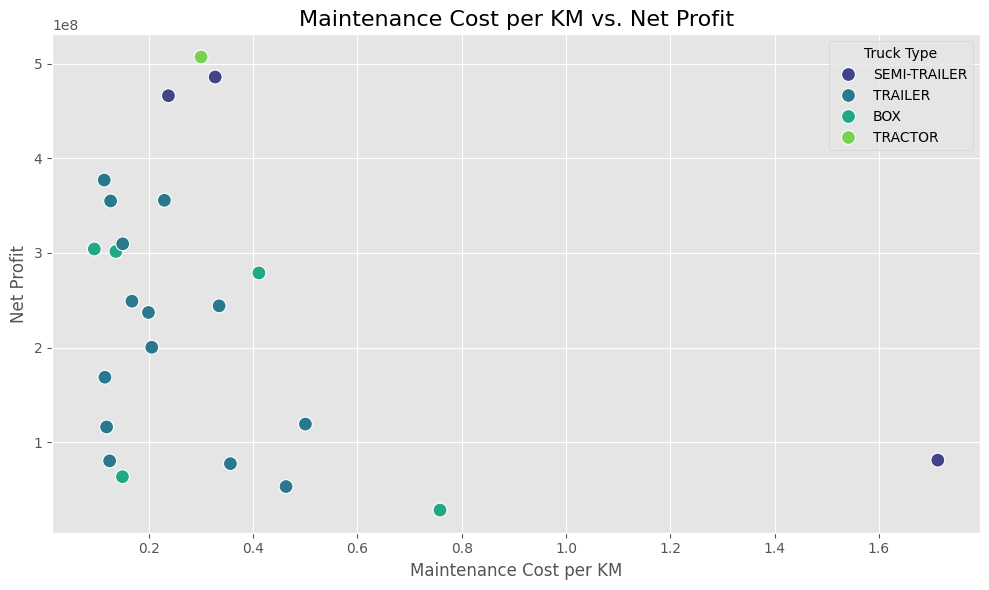

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_log2, x='Maintenance per KM', y='Net Profit', hue='Truck Type', palette='viridis', s=100)
plt.title('Maintenance Cost per KM vs. Net Profit', fontsize=16)
plt.xlabel('Maintenance Cost per KM')
plt.ylabel('Net Profit')
plt.legend(title='Truck Type')
plt.tight_layout()
plt.show()

# Task
Prepare the `merged_log2` DataFrame by selecting 'Net Profit' as the target variable and relevant numerical and categorical features for machine learning models. Handle any remaining missing values, encode categorical features using one-hot encoding, and then split the data into training and testing sets.

## Prepare Data for ML

### Subtask:
Select relevant features and a target variable from the `merged_log2` DataFrame, handle any remaining missing values, encode categorical variables, and split the data into training and testing sets for machine learning models.


**Reasoning**:
First, I will define the target variable `y` as 'Net Profit' and the features `X` using the specified columns from `merged_log2`. Then I will check for and handle any remaining missing values in both X and y. Following that, I will apply one-hot encoding to the 'Truck Type' categorical feature. Finally, I will split the data into training and testing sets.



In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Define the target variable y as the 'Net Profit' column
y = merged_log2['Net Profit']

# 2. Define the features X
feature_columns = ['KM Traveled', 'Liters', 'Fuel', 'Maintenance', 'Fixed Costs', 'Net Revenue', 'Weight (Kg)', 'Weight (Cubic)', 'Goods Value', 'KM per Liter', 'Maintenance per KM', 'Total Costs', 'Costs per KM', 'Costs per kg', 'Revenue per KM', 'Revenue per kg', 'Fuel costs per KM', 'Fixed costs per KM', 'Truck Type']
X = merged_log2[feature_columns].copy()

# 3. Check for and handle any remaining missing values
# For simplicity, dropping rows with any missing values in X or y
initial_rows = X.shape[0]
X_y_combined = pd.concat([X, y], axis=1)
X_y_combined_cleaned = X_y_combined.dropna()
X = X_y_combined_cleaned[feature_columns]
y = X_y_combined_cleaned['Net Profit']

if initial_rows - X.shape[0] > 0:
    print(f"Dropped {initial_rows - X.shape[0]} rows due to missing values.")
else:
    print("No missing values found in selected features or target.")

# 4. Apply one-hot encoding to the 'Truck Type' categorical feature
categorical_features = ['Truck Type']
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
final_feature_names = numerical_features + list(onehot_feature_names)

X_processed_df = pd.DataFrame(X_processed, columns=final_feature_names, index=X.index)

# 5. Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

print("Data preparation complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

No missing values found in selected features or target.
Data preparation complete.
Shape of X_train: (18, 22)
Shape of X_test: (5, 22)
Shape of y_train: (18,)
Shape of y_test: (5,)


## Train Multiple ML Models

### Subtask:
Train and evaluate several machine learning models (e.g., Linear Regression, Decision Tree Regressor, Random Forest Regressor) on the prepared dataset to predict the target variable.


**Reasoning**:
First, I will import the necessary machine learning models (Linear Regression, Decision Tree Regressor, and Random Forest Regressor) from their respective sklearn modules. Then, I will instantiate each model, setting `random_state=42` for the `RandomForestRegressor` for reproducibility. Finally, I will train each model using the `X_train` and `y_train` datasets and store them in distinct variables.



In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


**Reasoning**:
Now that the models are trained, I will evaluate their performance on the test data using common regression metrics such as R-squared (R2 Score), Mean Absolute Error (MAE), and Mean Squared Error (MSE).



In [93]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

models = {
    'Linear Regression': linear_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

    print(f"\n--- {name} --- ")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")


--- Linear Regression --- 
R2 Score: 1.0000
MAE: 0.86
MSE: 0.84
RMSE: 0.92

--- Decision Tree --- 
R2 Score: 0.0796
MAE: 66850389.20
MSE: 5853463348296238.00
RMSE: 76507929.97

--- Random Forest --- 
R2 Score: 0.7163
MAE: 40024123.23
MSE: 1803877023183658.75
RMSE: 42472073.45


Top 10 Most Important Features:
              Feature  Importance
7      Weight (Cubic)    0.205551
8         Goods Value    0.172154
5         Net Revenue    0.142263
6         Weight (Kg)    0.106164
2                Fuel    0.071016
1              Liters    0.068192
11        Total Costs    0.051352
4         Fixed Costs    0.040080
0         KM Traveled    0.022181
16  Fuel costs per KM    0.021392


/tmp/ipython-input-2770542208.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


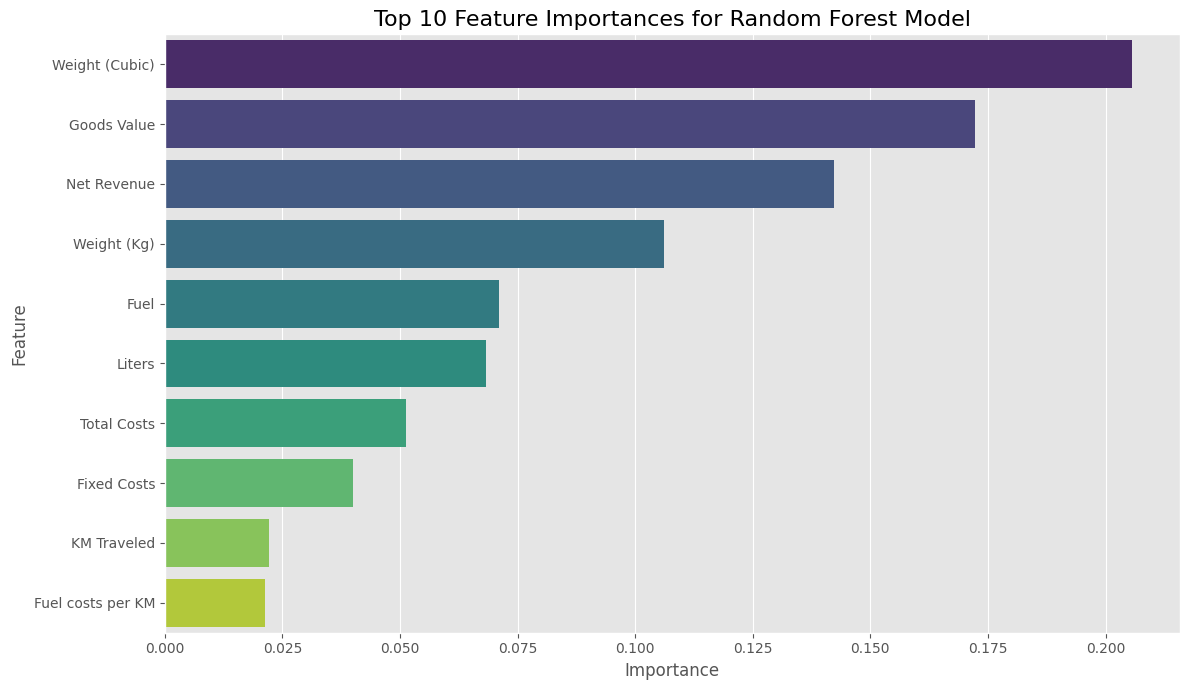

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Access the feature_importances_ attribute of the random_forest_model
feature_importances = random_forest_model.feature_importances_

# 2. Create a Pandas DataFrame containing the feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': feature_importances
})

# 3. Sort this DataFrame in descending order by importance score
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Print the top 10 most important features and their scores
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# 5. Create a bar plot to visualize the top 10 most important features
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances for Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [113]:
import pandas as pd

# Create aggregated dataframes for easier lookup
# Mean values for numerical features per Truck Type
truck_type_means = merged_log2.groupby('Truck Type')[numerical_features].mean()

# Individual truck details
truck_id_details = merged_log2.set_index('Truck ID')

def create_scenario_input(scenario_data):
    """
    Creates a DataFrame for a new scenario, filling missing numerical features
    based on Truck ID or Truck Type averages, and recalculating derived features.
    """
    input_df_row = pd.DataFrame([scenario_data])

    # Determine the base for filling in data
    if 'Truck ID' in scenario_data and scenario_data['Truck ID'] in truck_id_details.index:
        # Use specific truck's historical data as a base
        base_data = truck_id_details.loc[scenario_data['Truck ID']].copy()
        input_df_row['Truck Type'] = base_data['Truck Type'] # Ensure truck type is consistent
    elif 'Truck Type' in scenario_data and scenario_data['Truck Type'] in truck_type_means.index:
        # Use truck type's average data as a base
        base_data = truck_type_means.loc[scenario_data['Truck Type']].copy()
        input_df_row['Truck Type'] = scenario_data['Truck Type']
    else:
        raise ValueError("Must provide a valid 'Truck ID' or 'Truck Type'.")

    # Fill in numerical features from base_data if not explicitly provided
    for col in numerical_features:
        if col not in input_df_row.columns or pd.isna(input_df_row.loc[0, col]):
            input_df_row[col] = base_data[col]

    # Override with explicitly provided values
    for key, value in scenario_data.items():
        if key in numerical_features or key == 'Truck Type': # Make sure to capture Truck Type if provided
            input_df_row[key] = value

    # Recalculate derived features based on potentially new base values
    # Ensure required columns are numeric and handle potential division by zero
    input_df_row['KM Traveled'] = pd.to_numeric(input_df_row['KM Traveled'], errors='coerce').fillna(0)
    input_df_row['Liters'] = pd.to_numeric(input_df_row['Liters'], errors='coerce').fillna(1) # Avoid div by zero
    input_df_row['Fuel'] = pd.to_numeric(input_df_row['Fuel'], errors='coerce').fillna(0)
    input_df_row['Maintenance'] = pd.to_numeric(input_df_row['Maintenance'], errors='coerce').fillna(0)
    input_df_row['Fixed Costs'] = pd.to_numeric(input_df_row['Fixed Costs'], errors='coerce').fillna(0)
    input_df_row['Net Revenue'] = pd.to_numeric(input_df_row['Net Revenue'], errors='coerce').fillna(0)
    input_df_row['Weight (Kg)'] = pd.to_numeric(input_df_row['Weight (Kg)'], errors='coerce').fillna(1) # Avoid div by zero

    # Recalculate derived features
    input_df_row['KM per Liter'] = input_df_row['KM Traveled'] / input_df_row['Liters']
    input_df_row['Maintenance per KM'] = input_df_row['Maintenance'] / input_df_row['KM Traveled'].replace(0, np.nan)
    input_df_row['Total Costs'] = input_df_row['Fuel'] + input_df_row['Maintenance'] + input_df_row['Fixed Costs']
    input_df_row['Costs per KM'] = input_df_row['Total Costs'] / input_df_row['KM Traveled'].replace(0, np.nan)
    input_df_row['Costs per kg'] = input_df_row['Total Costs'] / input_df_row['Weight (Kg)'].replace(0, np.nan)
    input_df_row['Revenue per KM'] = input_df_row['Net Revenue'] / input_df_row['KM Traveled'].replace(0, np.nan)
    input_df_row['Revenue per kg'] = input_df_row['Maintenance'] / input_df_row['Weight (Kg)'].replace(0, np.nan)
    input_df_row['Fuel costs per KM'] = input_df_row['Fuel'] / input_df_row['KM Traveled'].replace(0, np.nan)
    input_df_row['Fixed costs per KM'] = input_df_row['Fixed Costs'] / input_df_row['KM Traveled'].replace(0, np.nan)

    # Fill any NaNs created by division by zero (e.g., if KM Traveled was 0) with 0 or an appropriate value
    input_df_row = input_df_row.fillna(0)

    return input_df_row

# --- Example Usage ---
print("Example Scenario 1: Predicting for a specific Truck ID with new KM Traveled and Weight data")
scenario_1_data = {
    'Truck ID': 2, # Existing Truck ID
    'KM Traveled': 120000, # New KM traveled
    'Weight (Kg)': 900000, # New Weight
    'Weight (Cubic)': 1300000, # New Weight (Cubic)
    'Goods Value': 13000000 # New Goods Value
}
new_data_input_1 = create_scenario_input(scenario_1_data)
display(new_data_input_1)

print("\nExample Scenario 2: Predicting for a Truck Type with new KM Traveled and Weight data")
scenario_2_data = {
    'Truck Type': 'BOX', # Truck Type
    'KM Traveled': 60000, # New KM traveled
    'Weight (Kg)': 100000, # New Weight
    'Weight (Cubic)': 150000, # New Weight (Cubic)
    'Goods Value': 3000000 # New Goods Value
}
new_data_input_2 = create_scenario_input(scenario_2_data)
display(new_data_input_2)

# Store the last created input for the predict_scenario_profit function
new_data_input = new_data_input_2 # You can change this to new_data_input_1 or create new ones


Example Scenario 1: Predicting for a specific Truck ID with new KM Traveled and Weight data


,Truck ID,KM Traveled,Weight (Kg),Weight (Cubic),Goods Value,Truck Type,Liters,Fuel,Maintenance,Fixed Costs,Net Revenue,KM per Liter,Maintenance per KM,Total Costs,Costs per KM,Costs per kg,Revenue per KM,Revenue per kg,Fuel costs per KM,Fixed costs per KM
0,2,120000,900000,1300000,13000000,SEMI-TRAILER,30372.53,99444.74,24815.92,216387.179745,466361310.0,3.950939,0.206799,340647.839745,2.838732,0.378498,3886.34425,0.027573,0.828706,1.803226



Example Scenario 2: Predicting for a Truck Type with new KM Traveled and Weight data


,Truck Type,KM Traveled,Weight (Kg),Weight (Cubic),Goods Value,Liters,Fuel,Maintenance,Fixed Costs,Net Revenue,KM per Liter,Maintenance per KM,Total Costs,Costs per KM,Costs per kg,Revenue per KM,Revenue per kg,Fuel costs per KM,Fixed costs per KM
0,BOX,60000,100000,150000,3000000,12305.762,41511.34,9550.904,102559.613181,195379184.0,4.875765,0.159182,153621.857181,2.560364,1.536219,3256.319733,0.095509,0.691856,1.709327


In [117]:
def predict_scenario_profit(scenario_input_df):
    """
    Predicts the Net Profit for a given scenario using the trained Random Forest model.
    """
    # 1. Preprocess the scenario input data using the fitted preprocessor
    scenario_processed = preprocessor.transform(scenario_input_df)

    # 2. Convert the transformed array back into a DataFrame with the final_feature_names as columns
    scenario_processed_df = pd.DataFrame(scenario_processed, columns=final_feature_names, index=scenario_input_df.index)

    # 3. Predict the net profit using the random_forest_model
    predicted_profit = random_forest_model.predict(scenario_processed_df)
    return predicted_profit[0]

# Call the predict_scenario_profit function for new_data_input_1
predicted_profit_scenario_1 = predict_scenario_profit(new_data_input_1)

# Call the predict_scenario_profit function for new_data_input_2
predicted_profit_scenario_2 = predict_scenario_profit(new_data_input_2)

# Print the predicted net profit for Scenario 1
print(f"\nPredicted Net Profit for Scenario 1 (Truck ID {scenario_1_data['Truck ID']}): ${predicted_profit_scenario_1:,.2f}")

# Print the predicted net profit for Scenario 2
print(f"Predicted Net Profit for Scenario 2 (Truck Type {scenario_2_data['Truck Type']}): ${predicted_profit_scenario_2:,.2f}")


Predicted Net Profit for Scenario 1 (Truck ID 2): $374,963,941.42
Predicted Net Profit for Scenario 2 (Truck Type BOX): $183,508,582.26


## Demonstrate Programmatic Dynamic Inputs

### Subtask:
Provide examples of how to programmatically define diverse scenarios using dictionaries, simulating dynamic selections for 'Truck Type', 'KM Traveled', 'Weight (Kg)', 'Weight (Cubic)', and 'Goods Value', and using the `create_scenario_input` function.


**Reasoning**:
To demonstrate programmatic scenario definition, I will define a new scenario dictionary, use the `create_scenario_input` function to process it, and then display the resulting DataFrame.



In [118]:
print("\nExample Scenario 3: Predicting for a different Truck Type with varied operational data")
scenario_3_data = {
    'Truck Type': 'SEMI-TRAILER', # New Truck Type
    'KM Traveled': 95000, # New KM traveled
    'Weight (Kg)': 800000, # New Weight
    'Weight (Cubic)': 1100000, # New Weight (Cubic)
    'Goods Value': 10000000 # New Goods Value
}
new_data_input_3 = create_scenario_input(scenario_3_data)
display(new_data_input_3)


Example Scenario 3: Predicting for a different Truck Type with varied operational data


,Truck Type,KM Traveled,Weight (Kg),Weight (Cubic),Goods Value,Liters,Fuel,Maintenance,Fixed Costs,Net Revenue,KM per Liter,Maintenance per KM,Total Costs,Costs per KM,Costs per kg,Revenue per KM,Revenue per kg,Fuel costs per KM,Fixed costs per KM
0,SEMI-TRAILER,95000,800000,1100000,10000000,17309.476667,56748.0,19335.34,144358.179771,3.444951e+08,5.488323,0.20353,220441.519771,2.320437,0.275552,3626.26393,0.024169,0.597347,1.51956


In [119]:
predicted_profit_scenario_3 = predict_scenario_profit(new_data_input_3)
print(f"Predicted Net Profit for Scenario 3 (Truck Type {scenario_3_data['Truck Type']}): ${predicted_profit_scenario_3:,.2f}")

Predicted Net Profit for Scenario 3 (Truck Type SEMI-TRAILER): $345,792,932.67
